# Визуализация

In [79]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [80]:
df = pd.read_csv('../data/bank.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [81]:
df = df.drop(columns=['RowNumber','CustomerId','Surname'])

In [82]:
df.describe(include='all')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000,10000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,650.528800,NaN,NaN,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,NaN,NaN,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,NaN,NaN,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           9091 non-null   float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


## В разрезе признаков

### Количественные

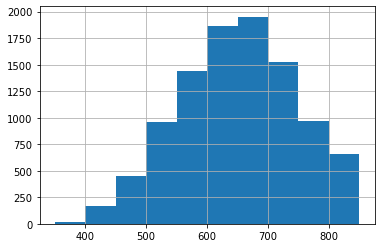

In [84]:
df["CreditScore"].hist();

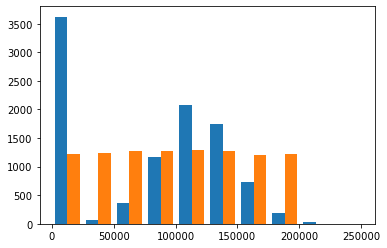

In [85]:
plt.hist(df[["Balance","EstimatedSalary"]]);

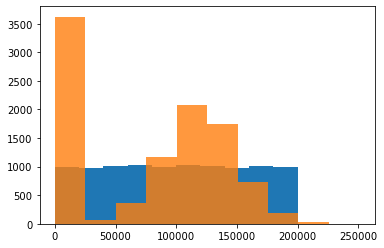

In [86]:

plt.hist(df["EstimatedSalary"]);
plt.hist(df["Balance"], alpha=0.8);

In [87]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

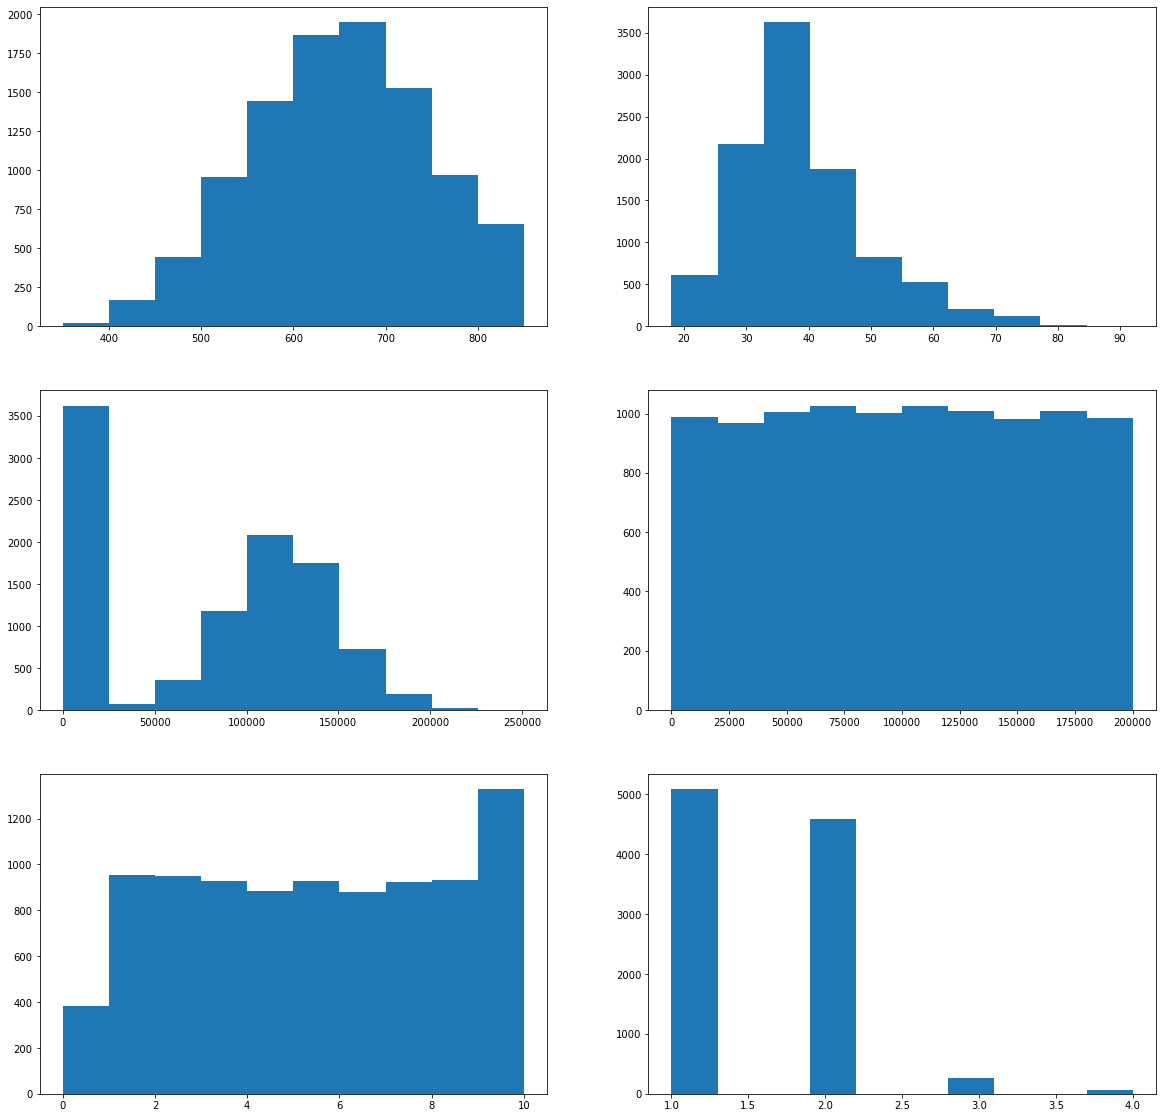

In [88]:
fig = plt.figure(figsize = (20, 20))
columns = ['CreditScore','Age','Balance','EstimatedSalary','Tenure','NumOfProducts']

for i in range(len(columns)):
    column = columns[i]
    ax = fig.add_subplot(3,2,i+1)
    ax.hist(df[column])

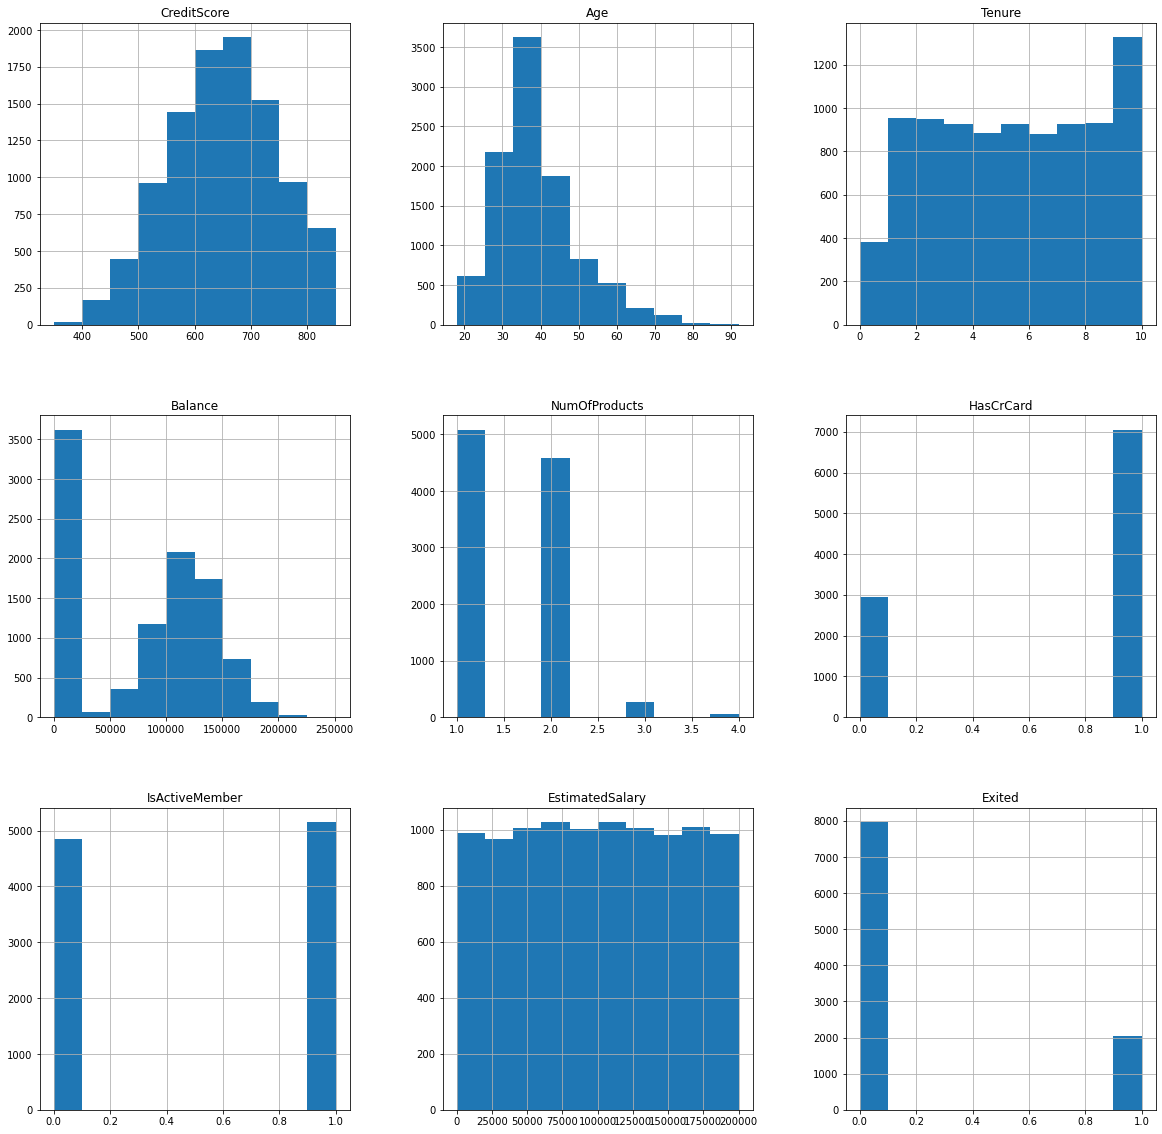

In [89]:
df.hist(figsize = (20, 20));

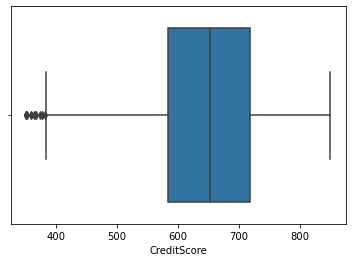

In [90]:
sns.boxplot(x ='CreditScore', data=df);

<AxesSubplot:>

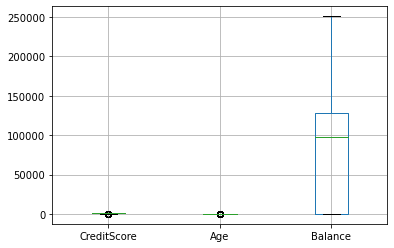

In [91]:
df[['CreditScore','Age','Balance']].boxplot()

### Категориальные (в т.ч. бинарные)

In [92]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<AxesSubplot:xlabel='Geography', ylabel='count'>

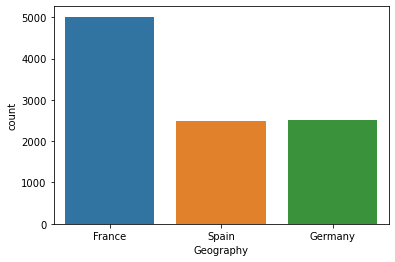

In [93]:
sns.countplot(x=df["Geography"])

<AxesSubplot:xlabel='Tenure', ylabel='count'>

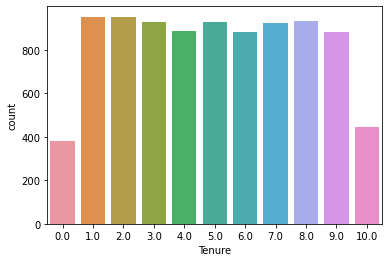

In [94]:
sns.countplot(x=df["Tenure"])

## Взаимодействия признаков

### Количественные к количественным

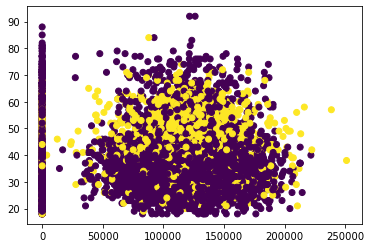

In [95]:
plt.scatter(df['Balance'], df['Age'], c=df['Exited'])

In [96]:
exited_clients = df[df['Exited']==1]
loyal_clients = df[df['Exited']==0]

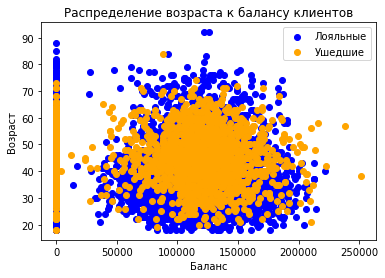

In [97]:
plt.scatter(loyal_clients['Balance'], loyal_clients['Age'], color="Blue", label="Лояльные")
plt.scatter(exited_clients['Balance'], exited_clients['Age'], color="Orange", label="Ушедшие")
plt.xlabel('Баланс')
plt.ylabel('Возраст')
plt.legend()
plt.title('Распределение возраста к балансу клиентов');

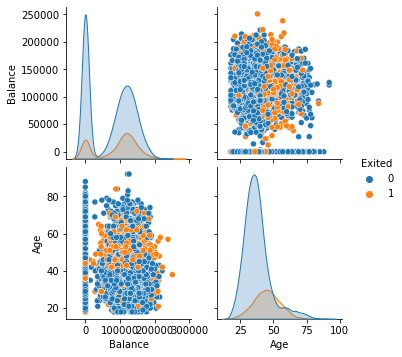

In [98]:
sns.pairplot(data=df[['Balance','Age','Exited']], hue='Exited')

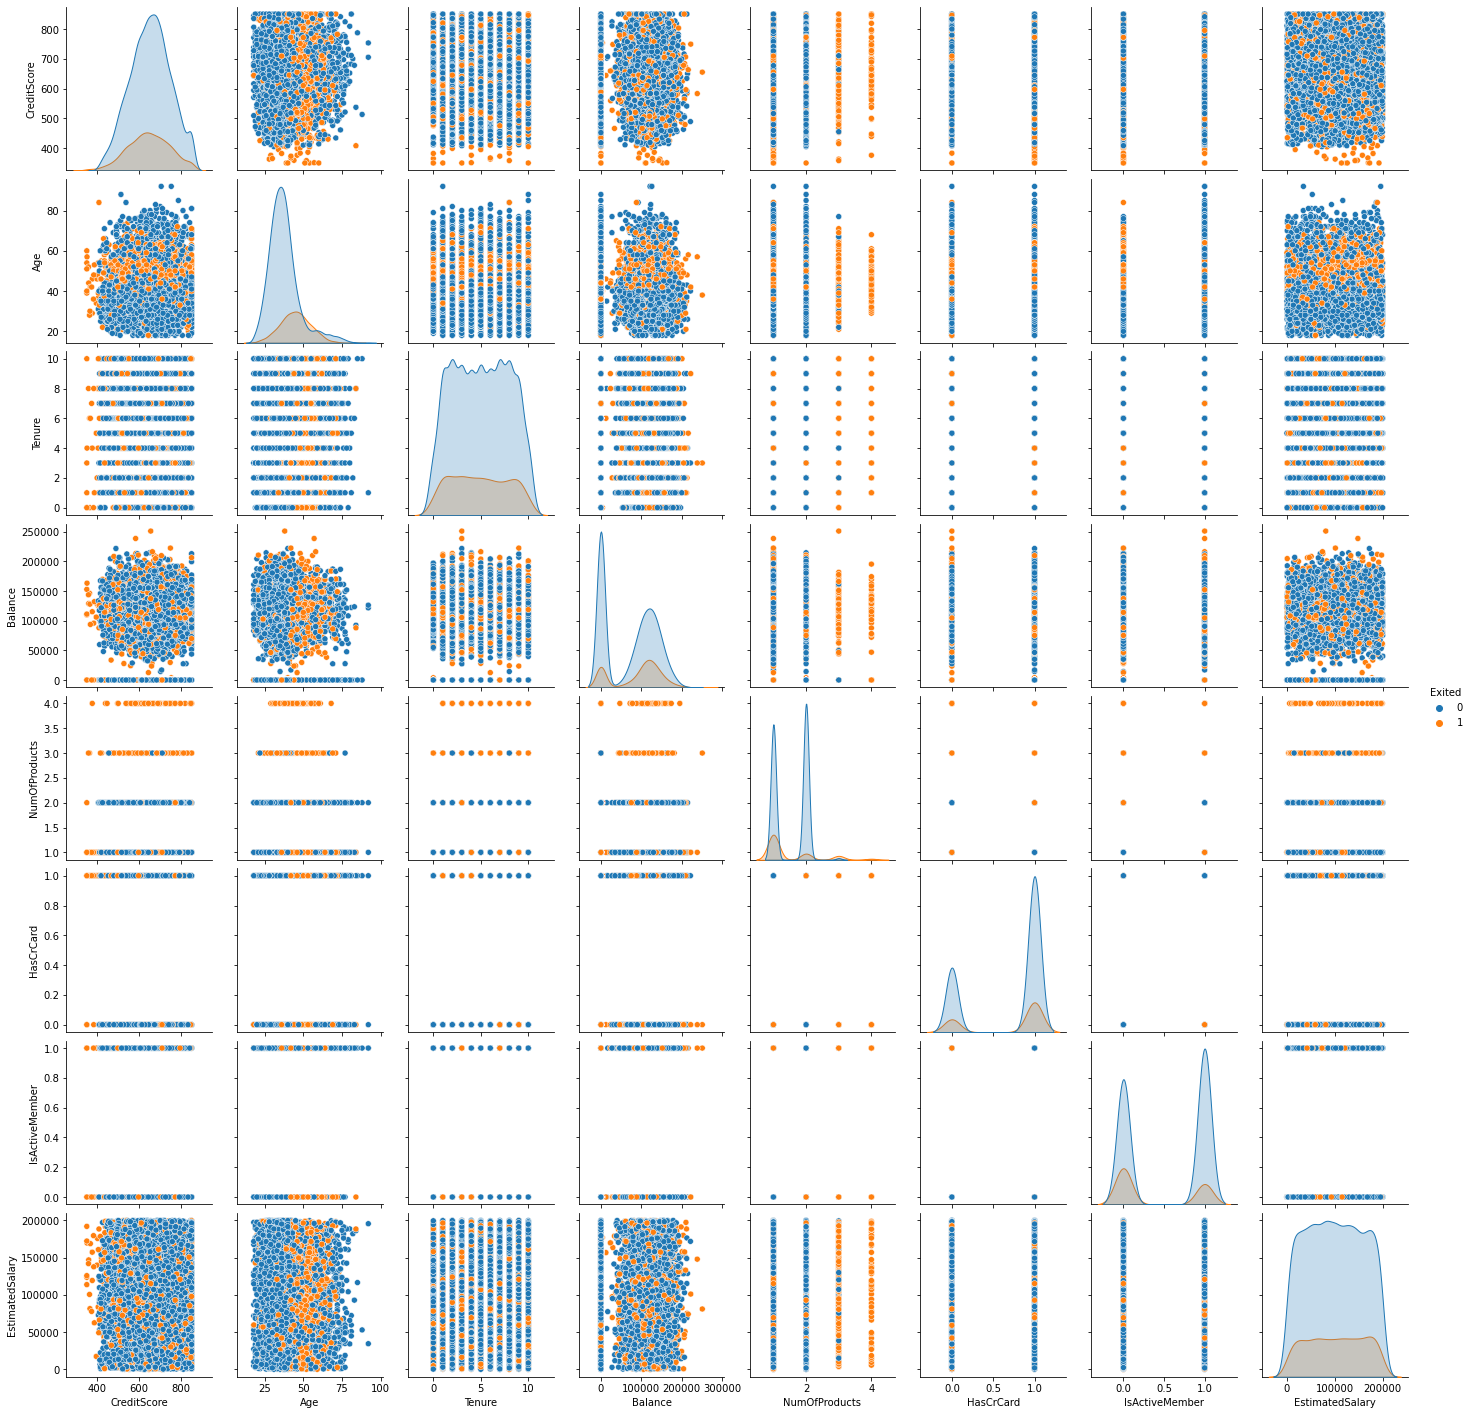

In [99]:
sns.pairplot(data=df, hue='Exited')

In [100]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,-0.000062,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.013134,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
Balance,0.006268,0.028308,-0.007911,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.011979,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.027232,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.032178,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.010520,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.016761,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<AxesSubplot:>

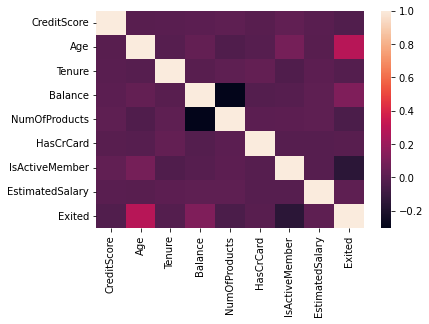

In [101]:
sns.heatmap(df.corr())

### Количественные к категориальным

<AxesSubplot:xlabel='Exited', ylabel='Age'>

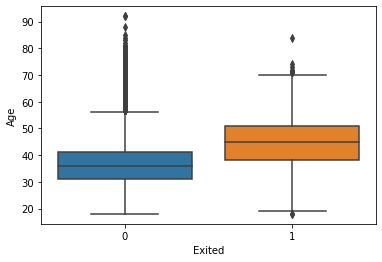

In [102]:
sns.boxplot(x="Exited",y="Age",data=df)

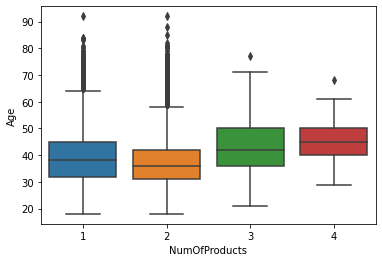

In [103]:
sns.boxplot(x="NumOfProducts",y="Age",data=df);

### Категориальные к категориальным

In [104]:
pd.crosstab(df['Exited'],df['Gender'])

Gender,Female,Male
Exited,,
0,3404,4559
1,1139,898


<AxesSubplot:xlabel='Exited', ylabel='count'>

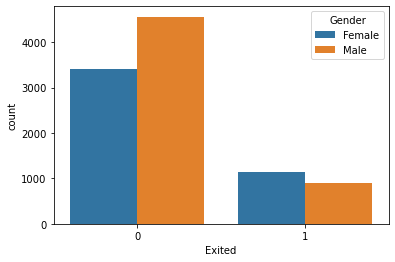

In [105]:
sns.countplot(x='Exited',hue='Gender', data=df)

<AxesSubplot:xlabel='Tenure', ylabel='count'>

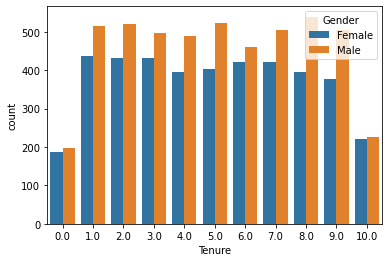

In [106]:
sns.countplot(x='Tenure',hue='Gender', data=df)

In [107]:
fmri = sns.load_dataset("fmri")

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

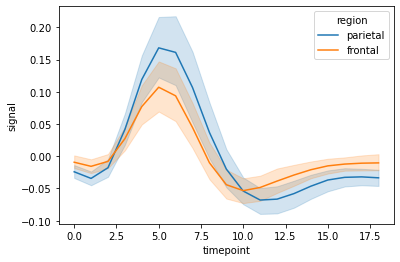

In [108]:
sns.lineplot(x="timepoint", y="signal",
             hue="region",
             data=fmri)

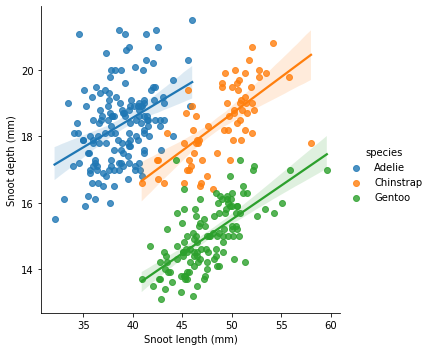

In [109]:
penguins = sns.load_dataset("penguins")
penguins
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=5
)
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")


## TSNE

In [110]:
from sklearn.manifold import TSNE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           9091 non-null   float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [111]:
tsne = TSNE(random_state = 0)
df_dummies = pd.get_dummies(df['Geography'])

In [112]:
df = pd.concat([df, df_dummies],axis=1)
df=df.drop(columns=['Geography'])
df['Gender']=df['Gender'].map({'Female':1, 'Male':0})

In [113]:
df=df.fillna(0)
tsne.fit(df)

/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


TSNE(random_state=0)

In [114]:
tsne.embedding_

array([[  0.7173922,  49.818623 ],
       [-27.784094 ,  21.693703 ],
       [-15.5083   , -36.660305 ],
       ...,
       [-22.758667 ,  81.028694 ],
       [  4.9571   ,  26.750885 ],
       [ 39.47976  , -15.30323  ]], dtype=float32)

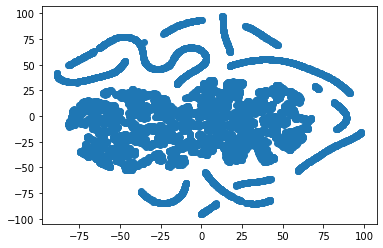

In [115]:
plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1])

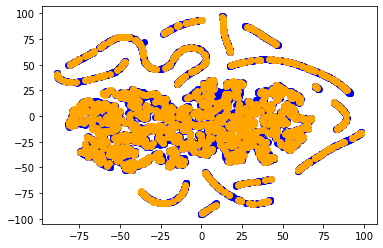

In [116]:
plt.scatter(tsne.embedding_[df['Exited']==0,0],tsne.embedding_[df['Exited']==0,1], color="blue")
plt.scatter(tsne.embedding_[df['Exited']==1,0],tsne.embedding_[df['Exited']==1,1], color="orange")

🛠 Построить распределение кредитного балла (CreditScore) клиента к балансу клиента (Balance), обозначить ушедших и лояльных клиентов

In [117]:
# Ваш код здесь

🛠 Как кредистный скоринг клиента (CreditScore) зависит от наличия кредитной карты клиента (HasCrCard)? Постройте boxplot.

In [118]:
# Ваш код здесь

🛠 Как срок владения счётом (Tenure) влияет на страну клиента (Geography)? Постройте сountplot

In [119]:
# Ваш код здесь